# This project examines patterns in manufacturing defects

Data is provided by Bosch

## Import and examine the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
tic = time.process_time()

In [2]:
folder = 'Bosch-Production-Line-Performance/'
batch_size = 80000

In [3]:
%%time
# reading only first 10000 rows because of file size and memory limitations

train_categorical_sample = pd.read_csv(folder+'train_categorical.csv', nrows=batch_size)
train_numeric_sample = pd.read_csv(folder+'train_numeric.csv', nrows=batch_size)
train_date_sample = pd.read_csv(folder+'train_date.csv', nrows=batch_size)

<string>:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,41,42,43,44,45,46,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,188,189,190,191,192,193,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,324,335,337,340,342,344,346,348,351,354,357,360,363,366,369,372,375,378,381,384,387,390,393,396,399,402,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,4

CPU times: user 27.9 s, sys: 1.55 s, total: 29.4 s
Wall time: 29.4 s


In [4]:
train_categorical_sample.head()

,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
train_numeric_sample.head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
train_date_sample.head()

,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,...,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263
0,4,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train_categorical_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Columns: 2141 entries, Id to L3_S49_F4240
dtypes: float64(1032), int64(1), object(1108)
memory usage: 1.3+ GB


In [8]:
train_numeric_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Columns: 970 entries, Id to Response
dtypes: float64(968), int64(2)
memory usage: 592.0 MB


In [9]:
train_date_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Columns: 1157 entries, Id to L3_S51_D4263
dtypes: float64(1156), int64(1)
memory usage: 706.2 MB


## Data Observations

### train_categorical Observations:

    Lots of NaNs... too many

    Lots of columns:  2141

    Columns are named this code of L0_S3_F69, for example:  Line, Station, Feature_number

### train_numeric Observations:

    Still quite a few NaNs, not as many as train_categorical
    
    Lots of columns:  970
    
    Columns are still named the similar code... Line, Station, Feature_number
    
    There's a column called "Response".... if 1, it failed Quality Control
    
### train_date Observations:

    Similar to train_numeric, except the columns are now D instead of F, for Datetime

Let's first get a list of the IDs that had Response 1 and 0:

Spoiler Alert:  Of the sample of the first 10000 items, 9947 passed, 53 failed.  Makes sense that most passed.

In [10]:
passedIDs = train_numeric_sample[train_numeric_sample['Response']==0]['Id']
failedIDs = train_numeric_sample[train_numeric_sample['Response']==1]['Id']

In [11]:
passedIDs.size

79557

In [12]:
failedIDs.size

443

## Possible Analysis Directions:

### What are the codings for the issues?

If there's an issue, presumably it's NOT a "NaN" value.  What are the other possible values?

In [13]:
def getUniqueValues(df):
    '''Gets all of the Unique Values within a DataFrame (that are not NaN)
    
    Inputs:  DataFrame
    Returns:  tuple of (list, integer)
        The list is a list of all the non-NaN unique values in the Dataframe
        The integer is the size of the list (NUMBER of non-NaN unique values)'''
    cols = df.columns
    values = df[cols[0]].dropna().unique()
    
    for col in cols:
        values = np.union1d(values, df[col].dropna().unique())
    
    return (list(values), values.size)

In [14]:
getUniqueValues(train_categorical_sample.drop('Id', axis=1))

(['T-2147481664',
  'T-21474819',
  'T-2147482432',
  'T-2147482688',
  'T-2147482816',
  'T-2147483648',
  'T-21474872',
  'T1',
  'T1152',
  'T128',
  'T1310',
  'T1372',
  'T143',
  'T145',
  'T16',
  'T16777216',
  'T16777232',
  'T16777248',
  'T16777557',
  'T2',
  'T24',
  'T256',
  'T262144',
  'T3',
  'T32',
  'T32896',
  'T331648',
  'T33554944',
  'T4',
  'T48',
  'T48576',
  'T5',
  'T512',
  'T524288',
  'T6',
  'T64',
  'T6553',
  'T65536',
  'T7',
  'T786432',
  'T8',
  'T83888',
  'T8912896',
  'T9',
  'T96',
  'T97',
  'T98'],
 47)

In [15]:
getUniqueValues(train_numeric_sample.drop('Id', axis=1))

([-1.0,
  -0.991,
  -0.9890000000000001,
  -0.987,
  -0.985,
  -0.9840000000000001,
  -0.983,
  -0.978,
  -0.9740000000000001,
  -0.9690000000000001,
  -0.968,
  -0.96,
  -0.955,
  -0.9520000000000001,
  -0.951,
  -0.95,
  -0.94,
  -0.934,
  -0.9309999999999999,
  -0.9259999999999999,
  -0.9229999999999999,
  -0.917,
  -0.9129999999999999,
  -0.9109999999999999,
  -0.909,
  -0.9059999999999999,
  -0.905,
  -0.903,
  -0.899,
  -0.898,
  -0.897,
  -0.893,
  -0.89,
  -0.88,
  -0.877,
  -0.863,
  -0.862,
  -0.861,
  -0.8590000000000001,
  -0.858,
  -0.85,
  -0.847,
  -0.845,
  -0.843,
  -0.841,
  -0.84,
  -0.838,
  -0.8370000000000001,
  -0.835,
  -0.8340000000000001,
  -0.833,
  -0.8320000000000001,
  -0.83,
  -0.8290000000000001,
  -0.828,
  -0.8270000000000001,
  -0.825,
  -0.8240000000000001,
  -0.818,
  -0.8170000000000001,
  -0.816,
  -0.815,
  -0.8140000000000001,
  -0.812,
  -0.81,
  -0.809,
  -0.8079999999999999,
  -0.807,
  -0.8059999999999999,
  -0.805,
  -0.804,
  -0.8029999999

### Split Categorical, Numeric, and Date into Pass/Fail subcategory DataFrames

First, bring in the Response column to Categorical and Date Dataframes

In [16]:
train_categorical_sample = pd.merge(train_categorical_sample, train_numeric_sample[['Id','Response']], on='Id')

In [17]:
train_date_sample = pd.merge(train_date_sample, train_numeric_sample[['Id','Response']], on='Id')

Then, split into Pass/Fail sub-DataFrames

In [18]:
train_categorical_sample_pass = train_categorical_sample[train_categorical_sample['Response']==0]
train_categorical_sample_fail = train_categorical_sample[train_categorical_sample['Response']==1]
train_numeric_sample_pass = train_numeric_sample[train_numeric_sample['Response']==0]
train_numeric_sample_fail = train_numeric_sample[train_numeric_sample['Response']==1]
train_date_sample_pass = train_date_sample[train_date_sample['Response']==0]
train_date_sample_fail = train_date_sample[train_date_sample['Response']==1]

### Analysis 1:  Do the Values (non-NaN) have any obvious correlation with QC Failure?

Does any value in **either** categorical **or** numeric cause it to fail QC?

   Let's look at how many non-NaNs there are for each row:  both categorical and numeric

In [19]:
def getCodesList(inputSeries, unique=True):
    '''Gets LIST of values in a Pandas Series that's not a NaN
    
    Input:  Pandas Series
    Output:  Integer (number of values that are not NaN)'''
    if unique:
        return inputSeries.dropna().unique()
    else:
        return inputSeries.dropna()

In [20]:
def countCodesSeries(inputSeries):
    '''Gets number of values in a Pandas Series that's not a NaN
    
    Input:  Pandas Series
    Output:  Integer (number of values that are not NaN)'''
    return getCodesList(inputSeries, unique=False).size

In [21]:
# add a column that counts # of not-NaNs

listOfDataFrames = [train_categorical_sample, train_categorical_sample_fail, train_categorical_sample_pass, train_numeric_sample, train_numeric_sample_fail, train_numeric_sample_pass, train_date_sample, train_date_sample_fail, train_date_sample_pass]

for df in listOfDataFrames:
    df['countNonNaN'] = df.drop('Response', axis=1).apply(countCodesSeries, axis=1)

/home/han/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
#train_categorical_sample['uniqueCodes'] = train_categorical_sample.drop(['Response', 'countNonNaN'], axis=1).apply(getCodesList, axis=1)

for df in listOfDataFrames:
    df['uniqueCodes'] = df.drop(['Id', 'Response', 'countNonNaN'], axis=1).apply(getCodesList, axis=1)

/home/han/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Frequency of # of not-NaNs')

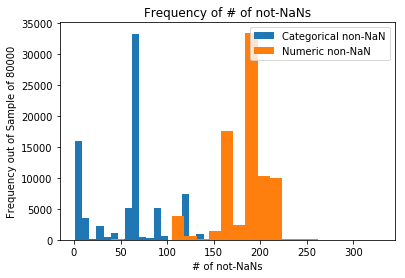

In [23]:
plt.hist(train_categorical_sample['countNonNaN'], bins=25, label='Categorical non-NaN')
plt.hist(train_numeric_sample['countNonNaN'], bins=25, label='Numeric non-NaN')
plt.legend()
plt.xlabel('# of not-NaNs')
plt.ylabel('Frequency out of Sample of {}'.format(batch_size))
plt.title('Frequency of # of not-NaNs')

Text(0.5, 1.0, 'Date')

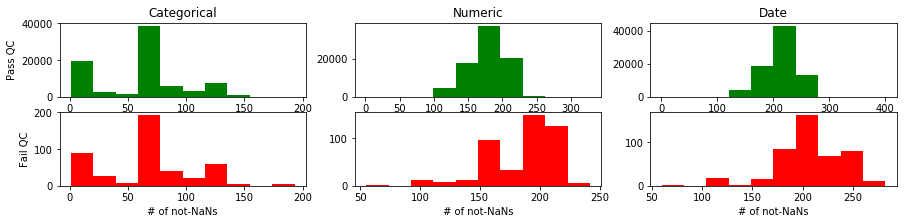

In [24]:
# Plot Pass vs Fail for # non-NaNs

(fig, axes) = plt.subplots(2,3, figsize=(15, 3))
axes[0,0].hist(train_categorical_sample_pass['countNonNaN'], bins=10, color='green')
axes[1,0].hist(train_categorical_sample_fail['countNonNaN'], bins=10, color='red')
axes[1,0].set_xlabel('# of not-NaNs')
axes[0,0].set_ylabel('Pass QC')
axes[1,0].set_ylabel('Fail QC')
axes[0,0].set_title('Categorical')

axes[0,1].hist(train_numeric_sample_pass['countNonNaN'], bins=10, color='green')
axes[1,1].hist(train_numeric_sample_fail['countNonNaN'], bins=10, color='red')
axes[1,1].set_xlabel('# of not-NaNs')
axes[0,1].set_title('Numeric')

axes[0,2].hist(train_date_sample_pass['countNonNaN'], bins=10, color='green')
axes[1,2].hist(train_date_sample_fail['countNonNaN'], bins=10, color='red')
axes[1,2].set_xlabel('# of not-NaNs')
axes[0,2].set_title('Date')

#### Answer: The entries CAN have Codes and still pass QC.

In fact, the number of Codes do NOT seem to have a correlation with Pass vs Fail.  

Observe the Pass vs Fail plots above:  The Pass vs Fail histograms are similar for # of Codes

#### So is the particular Code themselves an indicator of whether it passes or fails?

No.  We'll see below that *every* code that appears in the Fail set also happens to appear in the Pass set.  

So it's not particular codes that trigger QC fails.

In [25]:
uniqueValuesPass = getUniqueValues(train_categorical_sample_pass.drop(['Id', 'Response', 'countNonNaN', 'uniqueCodes'], axis=1))
uniqueValuesFail = getUniqueValues(train_categorical_sample_fail.drop(['Id', 'Response', 'countNonNaN', 'uniqueCodes'], axis=1))

In [26]:
uniqueValuesPass

(['T-2147481664',
  'T-21474819',
  'T-2147482432',
  'T-2147482688',
  'T-2147482816',
  'T-2147483648',
  'T-21474872',
  'T1',
  'T1152',
  'T128',
  'T1310',
  'T1372',
  'T143',
  'T145',
  'T16',
  'T16777216',
  'T16777232',
  'T16777248',
  'T16777557',
  'T2',
  'T24',
  'T256',
  'T262144',
  'T3',
  'T32',
  'T32896',
  'T331648',
  'T33554944',
  'T4',
  'T48',
  'T48576',
  'T5',
  'T512',
  'T524288',
  'T6',
  'T64',
  'T6553',
  'T65536',
  'T7',
  'T786432',
  'T8',
  'T83888',
  'T8912896',
  'T9',
  'T96',
  'T97',
  'T98'],
 47)

In [27]:
uniqueValuesFail

(['T-2147483648',
  'T1',
  'T128',
  'T1372',
  'T143',
  'T145',
  'T16',
  'T2',
  'T24',
  'T3',
  'T4',
  'T48',
  'T5',
  'T8',
  'T98'],
 15)

### Analysis 2:  Are Certain Lines, Stations and/or Features correlated with QC Failure?

Are certain features more prone to QC issues?

Are certain lines/stations more prone to QC issues?

In [28]:
def extractLSF(string, isDate=False):
    '''
    Given a string in the Bosch Line/Station/Feature format (eg: L0_S0_F26), extract the Line number, Station number, and Feature number
    
    Input: String in Lx_Sy_Fz format
    
    Output:  Tuple of (x, y, z)
    
    Sidenote:  isDate will extract based on Lx_Sy_Dd format instead, returns tuple of (x, y, d)
    '''
    # first assert the format is correct:
    splitStr = string.split('_')
    if isDate:
        prefixList = ['L', 'S', 'D']
    else:
        prefixList = ['L', 'S', 'F']
        
    assert len(splitStr) == 3, 'Not 3 substrings split by "_"s!'
    for i in range(0, len(splitStr)):
        assert splitStr[i][1:].isnumeric(), 'Not numeric following the single-letter prefix!'
        assert splitStr[i][:1] == prefixList[i], 'Not the proper single-letter prefixes!  Did you use a Date format and forget to set isDate=True?'
    
    #now extract numbers:
    tempList = []
    
    for substr in splitStr:
        tempList.append(float(substr[1:]))
        
    return tuple(tempList)
    

#### Get a list of Lines/Stations/Features that have Codes, for each Id 

In [29]:
def getListLSF(inputSeries, isDate=False):
    '''
    Given a series with fields of Bosch style Lx_Sy_Fz: Get the lines, stations, and features that have Codes
    Input:  series (row) in a Bosch-style QC matrix
    Output:  dictionary of lists of Lines, Stations, and Features that had codes
    '''
    seriesNoNaN = inputSeries.dropna()
    
    listL = []
    listS = []
    listF = []
    
    for field in seriesNoNaN.index:
        try:
            myL, myS, myF = extractLSF(field, isDate=isDate)
        except:
            continue
        listL.append(myL)
        listS.append(myS)
        listF.append(myF)
    
    return {'Lines': listL, 'Stations': listS, 'Features': listF}

In [30]:
def getListLSD(inputSeries):
    return getListLSF(inputSeries, isDate=True)

In [31]:
for df in listOfDataFrames[0:6]:
    df['LSFs-with-Codes'] = df.apply(getListLSF, axis=1)
    
for df in listOfDataFrames[6:9]:
    df['LSFs-with-Codes'] = df.apply(getListLSD, axis=1)

/home/han/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/han/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [32]:
categorical_lines_fail = []
categorical_stations_fail = []
categorical_features_fail = []

for dictionary in train_categorical_sample_fail['LSFs-with-Codes']:
    categorical_lines_fail.extend(dictionary['Lines'])
    categorical_stations_fail.extend(dictionary['Stations'])
    categorical_features_fail.extend(dictionary['Features'])
    
categorical_lines_pass = []
categorical_stations_pass = []
categorical_features_pass = []

for dictionary in train_categorical_sample_pass['LSFs-with-Codes']:
    categorical_lines_pass.extend(dictionary['Lines'])
    categorical_stations_pass.extend(dictionary['Stations'])
    categorical_features_pass.extend(dictionary['Features'])

In [33]:
numeric_lines_fail = []
numeric_stations_fail = []
numeric_features_fail = []

for dictionary in train_numeric_sample_fail['LSFs-with-Codes']:
    numeric_lines_fail.extend(dictionary['Lines'])
    numeric_stations_fail.extend(dictionary['Stations'])
    numeric_features_fail.extend(dictionary['Features'])
    
numeric_lines_pass = []
numeric_stations_pass = []
numeric_features_pass = []

for dictionary in train_numeric_sample_pass['LSFs-with-Codes']:
    numeric_lines_pass.extend(dictionary['Lines'])
    numeric_stations_pass.extend(dictionary['Stations'])
    numeric_features_pass.extend(dictionary['Features'])

In [34]:
date_lines_fail = []
date_stations_fail = []
date_features_fail = []

for dictionary in train_date_sample_fail['LSFs-with-Codes']:
    date_lines_fail.extend(dictionary['Lines'])
    date_stations_fail.extend(dictionary['Stations'])
    date_features_fail.extend(dictionary['Features'])
    
date_lines_pass = []
date_stations_pass = []
date_features_pass = []

for dictionary in train_date_sample_pass['LSFs-with-Codes']:
    date_lines_pass.extend(dictionary['Lines'])
    date_stations_pass.extend(dictionary['Stations'])
    date_features_pass.extend(dictionary['Features'])

### Looks like Stations is a big difference between passes and failures!

Look at how different the Pass and Fail graphs are!

Text(0.5, 1.0, 'Categorical, FEATURES')

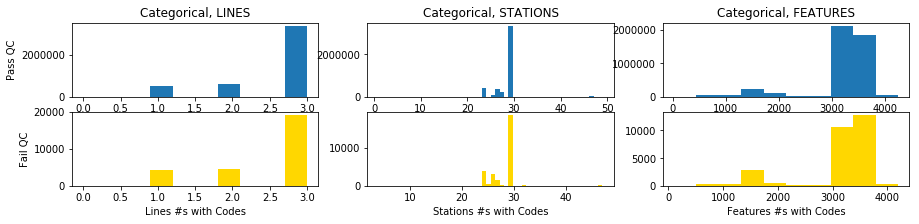

In [39]:
(fig, axes) = plt.subplots(2,3, figsize=(15,3))

axes[0,0].hist(categorical_lines_pass)
axes[1,0].hist(categorical_lines_fail, color='gold')
axes[1,0].set_xlabel("Lines #s with Codes")
axes[0,0].set_ylabel('Pass QC')
axes[1,0].set_ylabel('Fail QC')
axes[0,0].set_title('Categorical, LINES')

axes[0,1].hist(categorical_stations_pass, bins=50)
axes[1,1].hist(categorical_stations_fail, color='gold', bins=50)
axes[1,1].set_xlabel("Stations #s with Codes")
axes[0,1].set_title('Categorical, STATIONS')

axes[0,2].hist(categorical_features_pass)
axes[1,2].hist(categorical_features_fail, color='gold')
axes[1,2].set_xlabel("Features #s with Codes")
axes[0,2].set_title('Categorical, FEATURES')

Text(0.5, 1.0, 'Numeric, FEATURES')

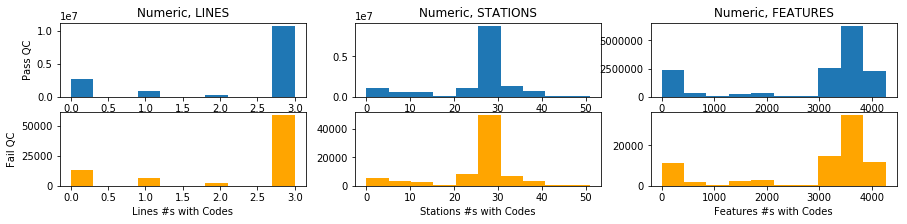

In [36]:
(fig, axes) = plt.subplots(2,3, figsize=(15,3))

axes[0,0].hist(numeric_lines_pass)
axes[1,0].hist(numeric_lines_fail, color='orange')
axes[1,0].set_xlabel("Lines #s with Codes")
axes[0,0].set_ylabel('Pass QC')
axes[1,0].set_ylabel('Fail QC')
axes[0,0].set_title('Numeric, LINES')

axes[0,1].hist(numeric_stations_pass)
axes[1,1].hist(numeric_stations_fail, color='orange')
axes[1,1].set_xlabel("Stations #s with Codes")
axes[0,1].set_title('Numeric, STATIONS')

axes[0,2].hist(numeric_features_pass)
axes[1,2].hist(numeric_features_fail, color='orange')
axes[1,2].set_xlabel("Features #s with Codes")
axes[0,2].set_title('Numeric, FEATURES')

Text(0.5, 1.0, 'date, FEATURES')

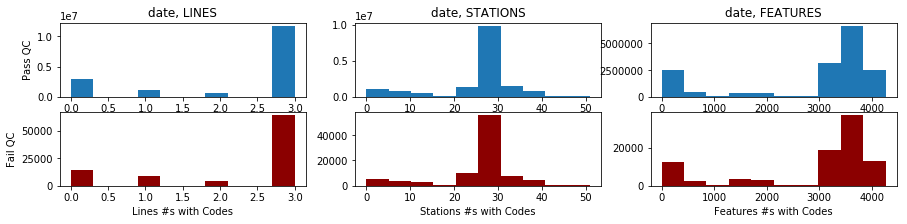

In [37]:
(fig, axes) = plt.subplots(2,3, figsize=(15,3))

axes[0,0].hist(date_lines_pass)
axes[1,0].hist(date_lines_fail, color='darkred')
axes[1,0].set_xlabel("Lines #s with Codes")
axes[0,0].set_ylabel('Pass QC')
axes[1,0].set_ylabel('Fail QC')
axes[0,0].set_title('date, LINES')

axes[0,1].hist(date_stations_pass)
axes[1,1].hist(date_stations_fail, color='darkred')
axes[1,1].set_xlabel("Stations #s with Codes")
axes[0,1].set_title('date, STATIONS')

axes[0,2].hist(date_features_pass)
axes[1,2].hist(date_features_fail, color='darkred')
axes[1,2].set_xlabel("Features #s with Codes")
axes[0,2].set_title('date, FEATURES')

In [38]:
# TIMER CELL

toc = time.process_time()
toc-tic

1670.1049783810001

# MY PROGRESS--------------------------------------------------------------------

### Analysis 3:  Datetime Analysis

Are certain dates/datetimes more prone to QC issues?

Are certain dates/datetimes more prone **for certain Lines/Stations**?

In [ ]:
train_date_sample[train_date_sample['Id'].isin(failedIDs)]